/Users/fridaperez/.local/lib/python3.8/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


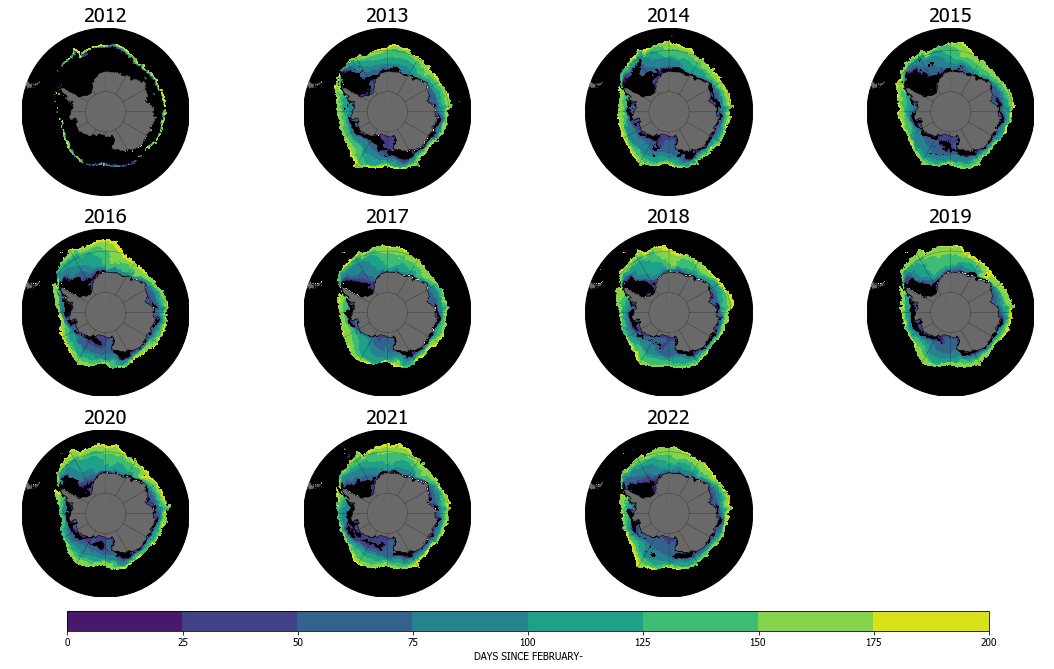

In [2]:
import numpy as np
import csv
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap
import os

# Sans Serif
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

# Here we use the netcdf package to assign all variables
sicnc = nc.Dataset('/Volumes/WorkDrive/melt_dates/seaiceconc.nc')
latitude = sicnc.variables['GridLat_SpPolarGrid12km'][:]
longitude = sicnc.variables['GridLon_SpPolarGrid12km'][:]

# List of years (titles)
years = list(range(2012, 2023))  # Start from 2012 and include 2022

# Directory containing the .nc files
dir = '/Volumes/WorkDrive/freeze_dates/files/nan/'

# Determine the number of rows and columns based on the number of years
num_years = len(years)
num_cols = 4  # Number of columns
num_rows = (num_years - 1) // num_cols + 1  # Calculate the number of rows

# Set up the figure and grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 9))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

for i, year in enumerate(years):
    matching_files = [f for f in os.listdir(dir) if f.endswith('.nc') and f.startswith(f'nan_y{year}_freeze5d_15')]    
    if matching_files:
        file_name = os.path.join(dir, matching_files[0])
        data = nc.Dataset(file_name)
        ice = data['__xarray_dataarray_variable__'][:]
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]

        map = Basemap(projection='spstere', boundinglat=-50, lon_0=180, resolution='l', round=True, ax=ax)
        x, y = map(longitude, latitude)
        map.drawmapboundary(fill_color='white')
        map.fillcontinents(color='dimgrey')
        map.drawlsmask(land_color='white', ocean_color='k')
        map.drawcoastlines(color='k', linewidth=0.5)

        # Draw parallels and meridians
        map.drawparallels(np.arange(-80., 0., 20.), labels=[False, False, False, False], linewidth=0.4, color='k',
                          fontsize=5)
        meridians = np.arange(0., 360., 30.)
        map.drawmeridians(meridians, labels=[1, 1, 1, 1], linewidth=0.4, color='k', fontsize=5, textcolor='white')

        # Regions
        # You can add region labels here

        mappable = map.contourf(x, y, ice[:], cmap='viridis')
        ax.set_title(str(year), fontsize=20)

# Remove the last subplot
if num_years < num_rows * num_cols:
    fig.delaxes(axes.flatten()[-1])

# Create a common colorbar for the entire figure
cax = fig.add_axes([0.1, -0.03, 0.8, 0.03])  # [left, bottom, width, height]
cbar = plt.colorbar(mappable, cax=cax, orientation='horizontal')
cbar.set_label('DAYS SINCE FEBRUARY-')

# Adjust spacing and add a title
plt.tight_layout()
#fig.suptitle('Sea Ice Data (2012-2022)', fontsize=16)
plt.subplots_adjust(top=0.9)

# Save the figure as a single image
figname = '/Users/fridaperez/Desktop/Advance_sea_ice_grid.png'
plt.savefig(figname, bbox_inches="tight", dpi=300)
plt.show()
